# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Load and Clean Files

In [2]:
# Load the sales data
sales_df = pd.read_csv("sales.csv")

In [3]:
# Load the weather data
weather_df = pd.read_csv("weather.csv")

In [4]:
# Load the fuel data
fuel_df = pd.read_csv("fuel.csv")

In [5]:
avg_temps_by_store = weather_df.groupby('Store')['Temperature'].mean()

In [6]:
# Group the data by "Retail Region" and "Date",
# calculate the average temperature for each group,
# and reset the index to make "Date" a regular column
region_temp = weather_df.groupby(["Store", "Date"])["Temperature"].mean().reset_index()

# Pivot the data to make "Retail Region" a column
region_temp_pivot = region_temp.pivot(index="Date", columns="Store", values="Temperature")

# Display the data
print(region_temp_pivot)

Store         1      2      3      4      5      6      7      8      9   \
Date                                                                       
1/11/2013  50.32  47.42  49.83  38.92  49.50  48.26  -6.61  38.79  42.47   
1/13/2012  48.53  45.99  51.86  34.41  48.86  48.33   7.46  36.46  42.44   
1/14/2011  35.40  33.02  44.76  31.60  37.74  38.37  11.32  31.62  36.43   
1/18/2013  42.92  40.98  49.09  34.06  45.08  44.94  -7.29  31.83  36.34   
1/20/2012  54.11  51.70  56.20  42.09  54.65  55.37  27.41  46.81  51.56   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
9/28/2012  76.08  79.45  77.46  71.74  78.33  77.82  50.64  71.10  76.80   
9/3/2010   81.21  81.83  84.16  76.80  84.06  82.15  49.84  76.14  82.47   
9/30/2011  79.69  78.14  82.58  72.15  81.16  82.51  47.34  72.20  78.45   
9/7/2012   83.96  87.65  84.99  82.09  86.30  86.33  57.84  80.87  87.93   
9/9/2011   76.00  77.97  81.72  73.34  79.04  80.21  45.61  69.01  75.65   

Store      

In [7]:
# Display information about the sales data
print("--- Sales Data ---")
print(sales_df.info())
print(sales_df.head(10))
print(sales_df.describe())

--- Sales Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Category      421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Holiday       421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
   Store  Category        Date  Weekly_Sales  Holiday
0      1         1  2010-02-05      24924.50    False
1      1         1  2010-02-12      46039.49     True
2      1         1  2010-02-19      41595.55    False
3      1         1  2010-02-26      19403.54    False
4      1         1  2010-03-05      21827.90    False
5      1         1  2010-03-12      21043.39    False
6      1         1  2010-03-19      22136.64    False
7      1         1  2010-03-26      26229.21    False


In [8]:
# Display information about the weather data
print("--- Weather Data ---")
print(weather_df.info())
print(weather_df.head(10))
print(weather_df.describe())

--- Weather Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB
None
   Store       Date  Temperature
0      1   2/5/2010        42.31
1      1  2/12/2010        38.51
2      1  2/19/2010        39.93
3      1  2/26/2010        46.63
4      1   3/5/2010        46.50
5      1  3/12/2010        57.79
6      1  3/19/2010        54.58
7      1  3/26/2010        51.45
8      1   4/2/2010        62.27
9      1   4/9/2010        65.86
             Store  Temperature
count  8190.000000  8190.000000
mean     23.000000    59.356198
std      12.987966    18.678607
min       1.000000    -7.290000
25%      12.000000    45.902500
50%      23.000000    60.710000
75%    

In [9]:
# Display information about the fuel pricing data
print("--- Fuel Pricing Data ---")
print(fuel_df.info())
print(fuel_df.head(10))
print(fuel_df.describe())

--- Fuel Pricing Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Store       8190 non-null   int64  
 1   Date        8190 non-null   object 
 2   Fuel_Price  8190 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.1+ KB
None
   Store        Date  Fuel_Price
0      1  2010-02-05       2.572
1      1  2010-02-12       2.548
2      1  2010-02-19       2.514
3      1  2010-02-26       2.561
4      1  2010-03-05       2.625
5      1  2010-03-12       2.667
6      1  2010-03-19       2.720
7      1  2010-03-26       2.732
8      1  2010-04-02       2.719
9      1  2010-04-09       2.770
             Store   Fuel_Price
count  8190.000000  8190.000000
mean     23.000000     3.405992
std      12.987966     0.431337
min       1.000000     2.472000
25%      12.000000     3.041000
50%      23.000000     3.513000
75%    

In [10]:
# convert Date column type 
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
fuel_df["Date"] = pd.to_datetime(fuel_df["Date"])

In [11]:
# Show missing data and incorrect values for the sales data
print("--- Sales Data ---")
print(sales_df.isnull().sum())
print(sales_df[sales_df["Weekly_Sales"] < 0])

# Show missing data and incorrect values for the weather data
print("--- Weather Data ---")
print(weather_df.isnull().sum())
print(weather_df[weather_df["Temperature"].isnull()])

# Show missing data and incorrect values for the fuel pricing data
print("--- Fuel Pricing Data ---")
print(fuel_df.isnull().sum())
print(fuel_df[fuel_df["Fuel_Price"] < 0])

--- Sales Data ---
Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64
        Store  Category       Date  Weekly_Sales  Holiday
846         1         6 2012-08-10       -139.65    False
2384        1        18 2012-05-04         -1.27    False
6048        1        47 2010-02-19       -863.00    False
6049        1        47 2010-03-12       -698.00    False
6051        1        47 2010-10-08        -58.00    False
...       ...       ...        ...           ...      ...
419597     45        80 2010-02-12         -0.43     True
419598     45        80 2010-02-19         -0.27    False
419603     45        80 2010-04-16         -1.61    False
419614     45        80 2010-07-02         -0.27    False
419640     45        80 2011-02-11         -0.24     True

[1285 rows x 5 columns]
--- Weather Data ---
Store          0
Date           0
Temperature    0
dtype: int64
Empty DataFrame
Columns: [Store, Date, Temperature]
Index: []
--- Fuel P

In [12]:

# Remove rows with negative sales in the sales data
sales_df = sales_df.dropna()
sales_df = sales_df[sales_df["Weekly_Sales"] >= 0]

# Merge 3 files

In [13]:
# Set the index of each DataFrame to the store and date columns
sales_df.set_index(["Store", "Date"], inplace=True)
weather_df.set_index(["Store", "Date"], inplace=True)
fuel_df.set_index(["Store", "Date"], inplace=True)

# Join the sales and weather data on the index
sales_weather_df = sales_df.join(weather_df, how="inner")

# Join the sales and weather data with the fuel pricing data on the index
all_data_df = sales_weather_df.join(fuel_df, how="inner")

# Reset the index to make the store and date columns regular columns
all_data_df.reset_index(inplace=True)

# Display the merged data
print("--- Joined Data ---")
print(all_data_df.info())
print(all_data_df.head())
print(all_data_df.tail())


--- Joined Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Date          420285 non-null  datetime64[ns]
 2   Category      420285 non-null  int64         
 3   Weekly_Sales  420285 non-null  float64       
 4   Holiday       420285 non-null  bool          
 5   Temperature   420285 non-null  float64       
 6   Fuel_Price    420285 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 19.6 MB
None
   Store       Date  Category  Weekly_Sales  Holiday  Temperature  Fuel_Price
0      1 2010-02-05         1      24924.50    False        42.31       2.572
1      1 2010-02-05         2      50605.27    False        42.31       2.572
2      1 2010-02-05         3      13740.12    False        42.31       2.572
3      1 2010-0

# Visualization

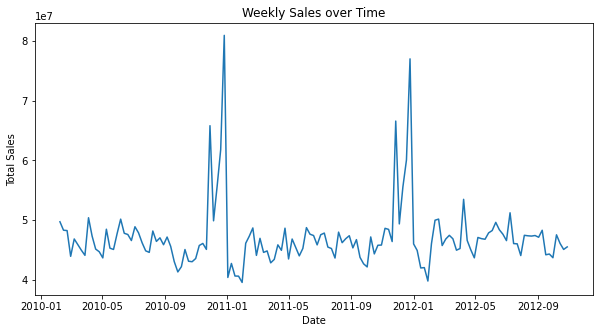

In [14]:
# Group the sales data by week and calculate the total sales for each week
weekly_sales = all_data_df.resample('W', on='Date')['Weekly_Sales'].sum()

# Create a line chart to show the weekly sales over time
plt.figure(figsize=(10,5))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

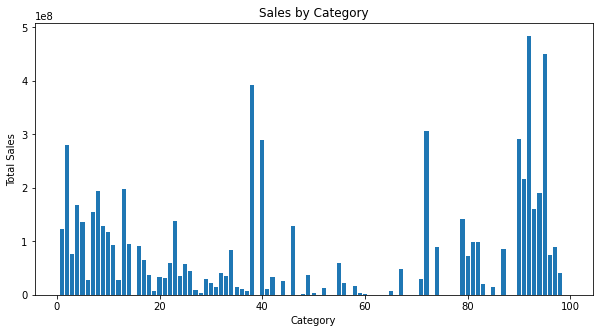

In [15]:
# Group the sales data by brand and calculate the total sales for each brand
sales_by_category = all_data_df.groupby('Category')['Weekly_Sales'].sum()

# Create a bar chart to show the sales by category
plt.figure(figsize=(10,5))
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64


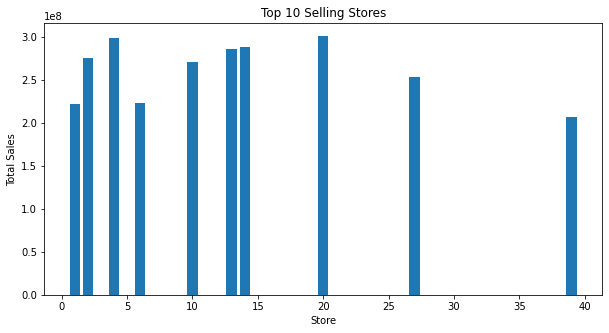

In [16]:
 #Group the sales data by store and calculate the total sales for each store
sales_by_store = all_data_df.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores by total sales and select the top 10
top_10_stores = sales_by_store.sort_values(ascending=False)[:10]

# Create a bar chart to show the top 10 selling stores
plt.figure(figsize=(10,5))
plt.bar(top_10_stores.index, top_10_stores.values)
plt.title('Top 10 Selling Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
print(top_10_stores)
plt.show()

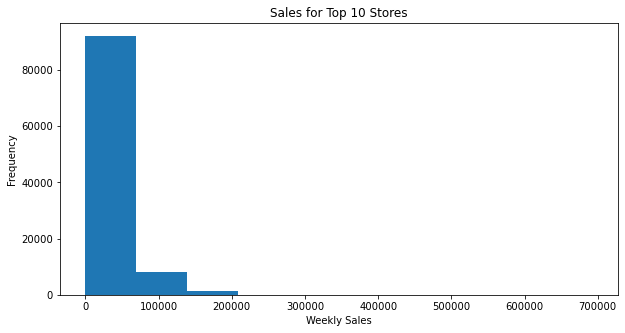

In [17]:
# Group the sales data by store and calculate the total sales for each store
sales_by_store = all_data_df.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores by total sales and select the top 10
top_10_stores = sales_by_store.sort_values(ascending=False)[:10]

# Filter the sales data to only include the top 10 stores
top_10_sales_data = all_data_df[all_data_df['Store'].isin(top_10_stores.index)]

# Create a histogram to show the sales for the top 10 stores
plt.figure(figsize=(10,5))
plt.hist(top_10_sales_data['Weekly_Sales'], bins=10)
plt.title('Sales for Top 10 Stores')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

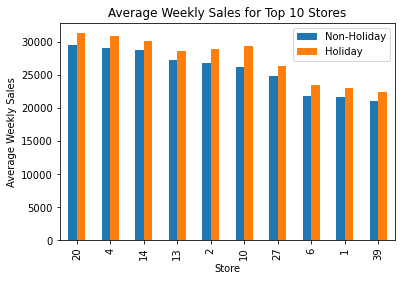

In [18]:
# Group the sales data by store and holiday status and calculate the average sales for each group
sales_by_store_holiday = all_data_df.groupby(['Store', 'Holiday'])['Weekly_Sales'].mean().unstack()

# Sort the stores by total sales and select the top 10
top_10_stores = all_data_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)[:10]

# Filter the sales data to only include the top 10 stores
sales_by_store_holiday_top_10 = sales_by_store_holiday.loc[top_10_stores.index]

# Create a grouped bar chart to compare the average weekly sales for the top 10 stores during holidays and non-holidays
sales_by_store_holiday_top_10.plot(kind='bar')
plt.title('Average Weekly Sales for Top 10 Stores')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.legend(['Non-Holiday', 'Holiday'])
plt.show()

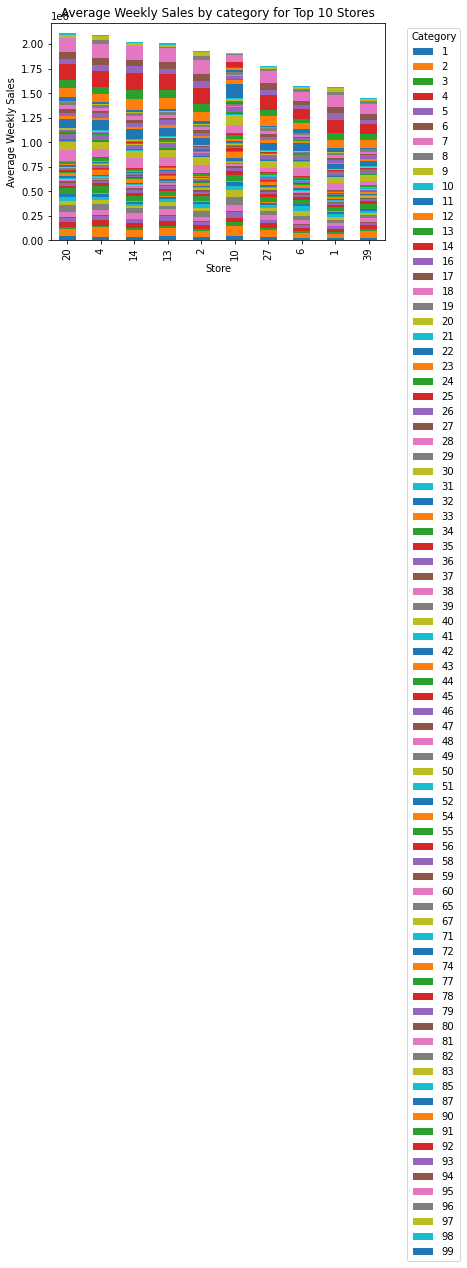

In [19]:
# Group the sales data by store, category and calculate the average sales for each group
sales_by_store_brand_dept = all_data_df.groupby(['Store', 'Category'])['Weekly_Sales'].mean().unstack()

# Sort the stores by total sales and select the top 10
top_10_stores = all_data_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)[:10]

# Filter the sales data to only include the top 10 stores
sales_by_store_brand_dept_top_10 = sales_by_store_brand_dept.loc[top_10_stores.index]

# Create a stacked bar chart to show the average weekly sales for each brand department for the top 10 stores
sales_by_store_brand_dept_top_10.plot(kind='bar', stacked=True)
plt.title('Average Weekly Sales by category for Top 10 Stores')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Category', loc='best' , bbox_to_anchor=(1.05, 1))
plt.show()

Text(0.5, 1.0, 'Weekly Sales vs Temperature')

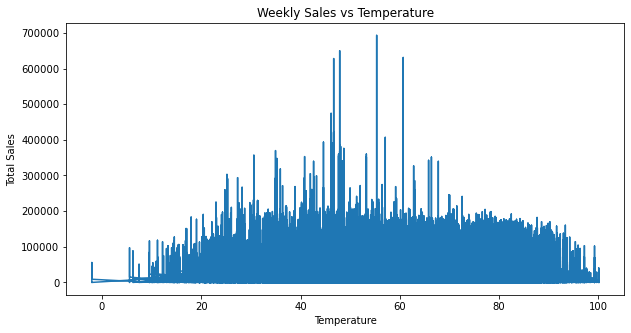

In [20]:
# Create a line chart of sales vs temperature
plt.figure(figsize=(10,5))
plt.plot(all_data_df['Temperature'], all_data_df['Weekly_Sales'] , linestyle='-')
plt.xlabel('Temperature')
plt.ylabel('Total Sales')
plt.title('Weekly Sales vs Temperature')


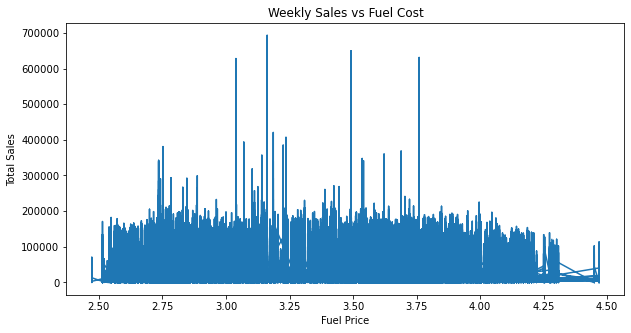

In [21]:


# Merge the sales, weather, and fuel cost data on the week index
# Create a line chart of sales vs fuel cost
plt.figure(figsize=(10,5))
plt.plot(all_data_df['Fuel_Price'], all_data_df['Weekly_Sales'])
plt.xlabel('Fuel Price')
plt.ylabel('Total Sales')
plt.title('Weekly Sales vs Fuel Cost')

plt.show()

# 2 machine Learning and cluster Models

In [22]:
# Convert the Date column to a numerical value
all_data_df["Date"] = pd.to_numeric(pd.to_datetime(all_data_df["Date"]))

# Split the data into features (predictors) and target (response)
X = all_data_df.drop(["Weekly_Sales"], axis=1)
y = all_data_df["Weekly_Sales"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

# Create a gradient boosting regression model and fit it to the training data
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Create a random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
# Make predictions on the testing data using both models
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate the R-squared score for each model
dt_accuracy = r2_score(y_test, dt_predictions)
rf_accuracy = r2_score(y_test, rf_predictions)

# Print the accuracy of each model
print("Decision Tree Model Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Random Forest Model Accuracy: {:.2f}%".format(rf_accuracy * 100))

Decision Tree Model Accuracy: 88.86%
Random Forest Model Accuracy: 94.80%


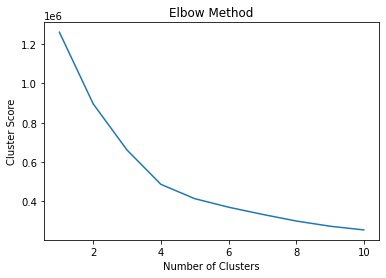

In [25]:

# Select the features to use for clustering
cluster_features = ["Weekly_Sales", "Temperature", "Fuel_Price"]

# Standardize the data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(all_data_df[cluster_features])

# Find the optimal number of clusters using the elbow method
cluster_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    cluster_scores.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cluster_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Score")
plt.title("Elbow Method")
plt.show()

# Create a clustering model with the optimal number of clusters (e.g., 4)
#kmeans = KMeans(n_clusters=4, random_state=42)
#kmeans.fit(cluster_data)

# Add the cluster labels to the original data
all_data_df["Cluster"] = kmeans.labels_